# **Beijing Air-Quality Time Series Project**

**Exploratory Data Analysis Notebook**

In [71]:
#importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [72]:
df=pd.read_csv('/content/dataset.csv')

**Data Preprocessing**

In [36]:
df.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4,4,4,7,300,77,-0.7,1023,-18.8,0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5.6,Aotizhongxin


In [37]:
df.shape

(420768, 18)

In [73]:
#drop non consequential columns
df=df.drop(columns='No')

In [74]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4,4,4,7,300,77,-0.7,1023,-18.8,0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4.7,Aotizhongxin
2,2013,3,1,2,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6,6,11,11,300,72,-1.4,1024.5,-19.4,0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3,3,12,12,300,72,-2,1025.2,-19.5,0,N,2,Aotizhongxin


In [75]:
#converting the year	month	day	hour to date time index
df['date']=pd.to_datetime(df[['year','month','day','hour']])
#set the date column as the index
df.set_index('date',inplace=True)
#dropiing the columns 'year','month','day','hour'
df=df.drop(columns=['year','month','day','hour'])
df.head(3)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,
2013-03-01 00:00:00,4,4,4,7,300,77,-0.7,1023,-18.8,0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5.6,Aotizhongxin


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   PM2.5    420768 non-null  object
 1   PM10     420768 non-null  object
 2   SO2      420768 non-null  object
 3   NO2      420768 non-null  object
 4   CO       420768 non-null  object
 5   O3       420768 non-null  object
 6   TEMP     420768 non-null  object
 7   PRES     420768 non-null  object
 8   DEWP     420768 non-null  object
 9   RAIN     420768 non-null  object
 10  wd       420768 non-null  object
 11  WSPM     420768 non-null  object
 12  station  420768 non-null  object
dtypes: object(13)
memory usage: 44.9+ MB


We see that the PM2.5	PM10,	SO2,	NO2	,CO	,O3 , TEMP,	PRES	DEWP,	RAIN are all objects. We can convert this into floats so we can use them to visulaize the data further. Where there are missing values the missing value has been imputed with '?'. Consequetly let replace the '?' with np.nan

In [76]:
#list object columns
object_cols= ['PM2.5', 'PM10', 'SO2', 'NO2' ,'CO','O3' , 'TEMP', 'PRES', 'DEWP', 'RAIN']
#converting the columns to floats
for col in object_cols:
  #replacing '?' with Nan
  df[col]=df[col].replace('?', np.nan)
  #converting the object type to float type
  df[col]=df[col].astype(float)



In [77]:
#checking for percentage of missigness in every column
per_missingness=df.isnull().sum().sort_values(ascending=False)/len(df)*100
# transform the array into a dataframe
per_missingness = pd.DataFrame(per_missingness.reset_index())
# add column names to the dataframe
per_missingness.columns = ['variable', 'na_percentage']
per_missingness.head(10)


,variable,na_percentage
0,CO,4.919813
1,O3,3.155421
2,NO2,2.879497
3,SO2,2.143937
4,PM2.5,2.076916
5,PM10,1.532674
6,DEWP,0.095777
7,TEMP,0.094589
8,PRES,0.093401
9,RAIN,0.092688


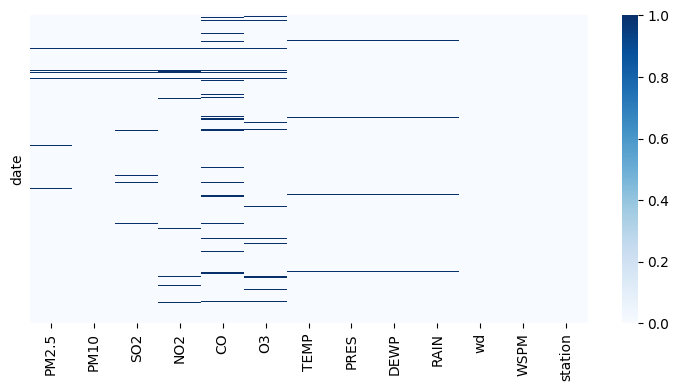

In [80]:
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Blues")
plt.show()


From the data we see that the PM2.5	PM10	SO2	NO2	CO	O3	TEMP	PRES	have missing values. As this is a time series interpolation is a great way to impute the missing values, however let's have a look at the trend and seasonality of the data  using PM2.5 as the target variable to figure out a suitable imputation method.

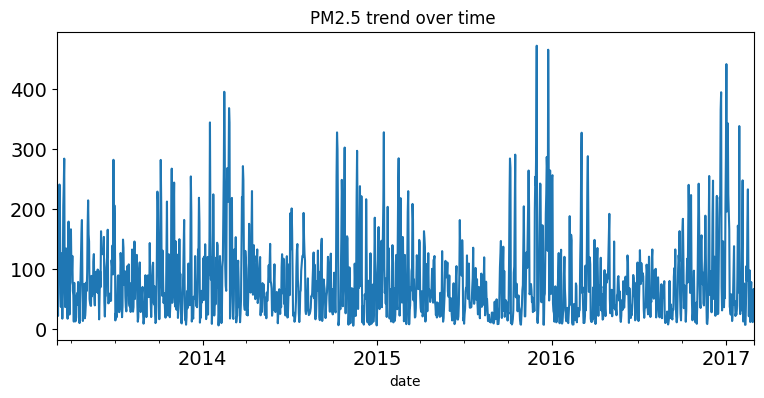

In [83]:
title='PM2.5 trend over time '
# daily mean PM2.5
df['PM2.5'].resample(rule='D').mean().plot(figsize=(9,4), title=title, fontsize=14)
plt.show()

In [46]:
#interpolating the dataset
df=df.interpolate(method='time')

In [49]:
#checking if there are missing values after interpolation
df.isna().sum().sum()


0

Perfect!!Now there is no missingness.


# **Exploratory Data Analaysis**